<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/REGRESS%C3%83O_LINEAR_COM_SK_LEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf


In [59]:
df= pd.read_excel('/content/C├│pia de aprovacao_alunos.xlsx')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [61]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [62]:
df.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


<Axes: xlabel='ano_2015', ylabel='Count'>

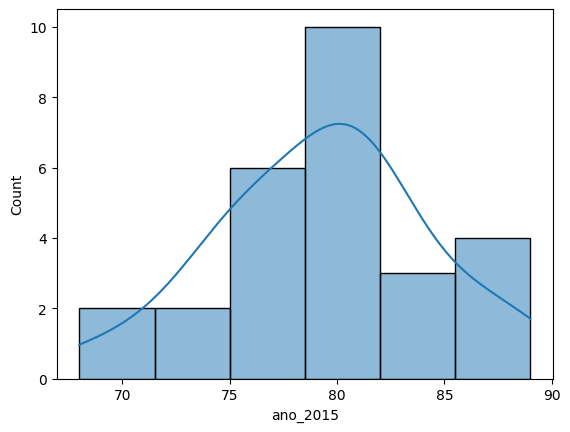

In [78]:
sns.histplot(data=df, x="ano_2015", kde=True)

<Axes: xlabel='ano_2016', ylabel='Count'>

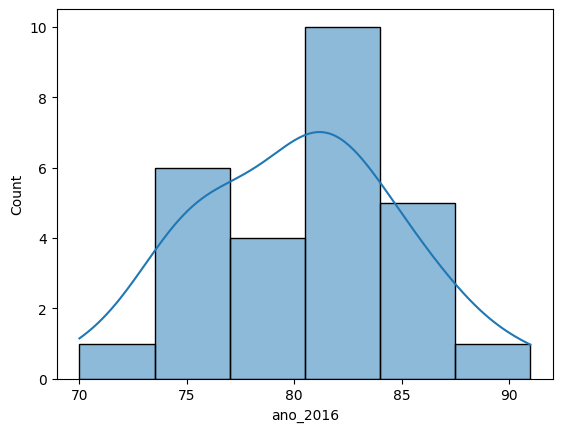

In [79]:
sns.histplot(data=df, x="ano_2016", kde=True)

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

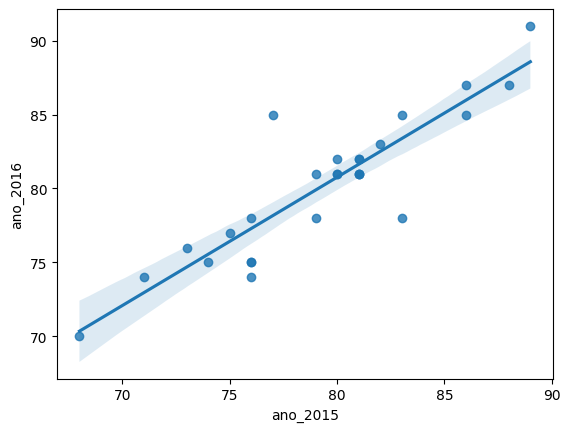

In [63]:
sns.regplot(x='ano_2015', y='ano_2016', data=df)

In [64]:
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [65]:
scaler = MinMaxScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df),index = df.index , columns = df.columns)
df_norm.head()


,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [66]:
df_norm.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [80]:
df_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


<Axes: xlabel='ano_2015', ylabel='ano_2016'>

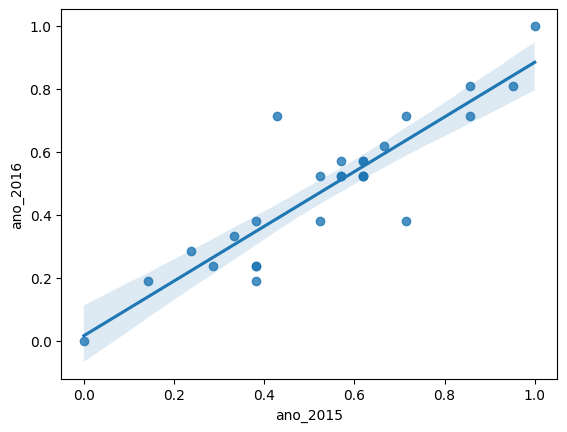

In [81]:
sns.regplot(x='ano_2015', y='ano_2016', data=df_norm)

In [67]:
function = "ano_2015 ~ ano_2016"
model = smf.ols(formula = function,data = df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2015   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           3.02e-10
Time:                        18:06:31   Log-Likelihood:                 22.904
No. Observations:                  27   AIC:                            -41.81
Df Residuals:                      25   BIC:                            -39.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0922      0.049      1.874      0.0

In [68]:
function = "ano_2015 ~ ano_2016"
model = smf.ols(formula = function,data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2015   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           3.02e-10
Time:                        18:06:31   Log-Likelihood:                -59.298
No. Observations:                  27   AIC:                             122.6
Df Residuals:                      25   BIC:                             125.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3525      7.389      0.724      0.4

In [69]:
x = df_norm["ano_2015"]
y = df_norm["ano_2016"]

In [70]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size = 0.30,random_state = 42)
lr = LinearRegression()
lr.fit(x_treino.values.reshape(-1,1),y_treino)
LinearRegression()

LinearRegression()

In [71]:

r_sq = lr.score(x_treino.values.reshape(-1,1),y_treino)
print(r_sq)

0.8573811509591327


In [72]:

y_pred_treino = lr.predict(x_treino.values.reshape(-1,1))
print("MAE:",metrics.mean_absolute_error(y_treino,y_pred_treino))
print("MSE:",metrics.mean_squared_error(y_treino,y_pred_treino))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_treino,y_pred_treino)))

MAE: 0.06424224772848623
MSE: 0.007182646326377206
RMSE: 0.08475049454945502


In [73]:
lr.fit(x_teste.values.reshape(-1,1),y_teste)

LinearRegression()

In [74]:

lr_pred_teste = lr.predict(x_teste.values.reshape(-1,1))
print("MAE:",metrics.mean_absolute_error(y_teste,lr_pred_teste))
print("MSE:",metrics.mean_squared_error(y_teste,lr_pred_teste))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_teste,lr_pred_teste)))

MAE: 0.08598680436029836
MSE: 0.012932872836774158
RMSE: 0.1137227894345463
